In [ ]:

import pandas as pd
import spacy 

In [ ]:
df = pd.read_csv('WikiLarge_Train.csv')
concreteness = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\Concreteness_ratings_Brysbaert_et_al_BRM.txt', delimiter = "\t")
basic = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\dale_chall.txt', delimiter = "\t", header=None)
aol =pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\AoA_51715_words.csv', header=0,encoding = "ISO-8859-1" )

In [ ]:
!python -m spacy download en_core_web_lg

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.3.1-py3-none-any.whl size=782936122 sha256=1c196154ad443bcf761ff4602c14303ec127778c6706160f9da65c19915621c1
  Stored in directory: c:\users\corsi\appdata\local\pip\cache\wheels\18\17\bd\804ef6d238a8078be05fd95a64d27d4369846b45d6adc2816a
Successfully built en-core-web-lg
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
import en_core_web_lg
nlp_model = en_core_web_lg.load()
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp_model.vocab)

In [ ]:
[i for i in tokenizer('hello lads!, ?')]

[hello, lads!,, ?]

In [ ]:
aol.head()

,Word,Alternative.spelling,Freq_pm,Dom_PoS_SUBTLEX,Nletters,Nphon,Nsyll,Lemma_highest_PoS,AoA_Kup,Perc_known,AoA_Kup_lem,Perc_known_lem,AoA_Bird_lem,AoA_Bristol_lem,AoA_Cort_lem,AoA_Schock
0,a,a,20415.27,Article,1,1,1,a,2.89,1.00,2.89,1.00,3.16,NaN,NaN,NaN
1,aardvark,aardvark,0.41,Noun,8,7,2,aardvark,9.89,1.00,9.89,1.00,NaN,NaN,NaN,NaN
2,abacus,abacus,0.24,Noun,6,6,3,abacus,8.69,0.65,8.69,0.65,NaN,NaN,NaN,NaN
3,abacuses,abacuses,0.02,Noun,8,9,4,abacus,NaN,NaN,8.69,0.65,NaN,NaN,NaN,NaN
4,abalone,abalone,0.51,Verb,7,7,4,abalone,12.23,0.72,12.23,0.72,NaN,NaN,NaN,NaN


In [ ]:
def lemmatize_text_no_punc(text): #lemma_word1.append(token.lemma_)
    text = " ".join([w.lower() for w in text.split()]) # may not need it's lowercasing beforing sending to tokenizer appears to make some difference like References 
    return " ".join([w.lemma_.lower() for w in tokenizer(text) if nlp_model.vocab[w.lemma_].is_punct == False])

def lemmatize_text(text): #lemma_word1.append(token.lemma_)
    text = " ".join([w.lower() for w in text.split()]) # may not need it's lowercasing beforing sending to tokenizer appears to make some difference like References 
    return " ".join([w.lemma_.lower() for w in tokenizer(text)])

In [ ]:
nlp_model.vocab['/'].is_oov == False

True

In [ ]:
df.iloc[0]['original_text']

"There is manuscript evidence that Austen continued to work on these pieces as late as the period 1809 â '' 11 , and that her niece and nephew , Anna and James Edward Austen , made further additions as late as 1814 ."

In [ ]:
lemmatize_text_no_punc(df.iloc[0]['original_text'])

'there be manuscript evidence that austen continue to work on this piece a late a the period 1809 â 11 and that her niece and nephew anna and james edward austen make far addition a late a 1814'

In [ ]:
df.iloc[0]['original_text']

"There is manuscript evidence that Austen continued to work on these pieces as late as the period 1809 â '' 11 , and that her niece and nephew , Anna and James Edward Austen , made further additions as late as 1814 ."

In [ ]:
basic.rename(columns={0:'Word'},inplace=True)
basic['Word'] = basic['Word'].astype(str)
basic['Word_lem'] = basic['Word'].apply(lemmatize_text)

concreteness['Word'] = concreteness['Word'].astype(str)
concreteness['Word_lem'] = concreteness['Word'].apply(lemmatize_text)

aol['Word'] = aol['Word'].astype(str)
aol['Word_lem'] = aol['Word'].apply(lemmatize_text)

df['text_lemma'] = df['original_text'].apply(lemmatize_text)
df['text_lemma_no_punc'] = df['original_text'].apply(lemmatize_text_no_punc)

In [ ]:

# # import these modules
# from nltk.stem import PorterStemmer
# from nltk.tokenize import word_tokenize
# from nltk.stem.snowball import SnowballStemmer
# ps = PorterStemmer()
 
# # choose some words to be stemmed
# words = ['stampeders', 'stamp']
 
# for w in words:
#     print(w, " : ", ps.stem(w))

stampeders  :  stamped
stamp  :  stamp


In [ ]:
s = lemmatize_text_no_punc(df.iloc[0]['original_text'])

count = 0
for i in s:
  if len(basic_word_set.intersection(i)) == 1:
    count+=1
print(count)

33


In [ ]:
basic_word_set = set(basic['Word_lem'].to_list())

def basic_rank(text): # could also potentially reduce to stem to check as well stampeders should map to stamp
  split_sent = text.split()
  split_len = len(split_sent)
  count = 0
  count = len(basic_word_set.intersection(set(split_sent)))
  # for i in split_sent:
  #   if len(basic_word_set.intersection(i)) == 1:
  #     count+=1
  try:
    return count/split_len
  except:
    return 0

def oov(text): # higher less words oov
  split_sent = text.split()
  split_len = len(split_sent)
  count = 0
  for i in split_sent:
    if nlp_model.vocab[i].is_oov == False:
      count+=1
  
  try:
    return count/split_len
  except:
    return 0

In [ ]:
df['basic_rank'] = df['text_lemma'].apply(basic_rank)
df['basic_rank_no_punc'] = df['text_lemma_no_punc'].apply(basic_rank) # could be more accurate because not diluted by punctuation

# df['oov_rank'] = df['text_lemma'].apply(oov)
# df['oov_rank_no_punc'] = df['text_lemma_no_punc'].apply(oov)

In [ ]:
df.select_dtypes('number').groupby('label').mean()

,basic_rank,basic_rank_no_punc,oov_rank,oov_rank_no_punc,word_len,word_len_no_punc,sent_len,word_count_no_punct,word_count,punct,...,concreteness_rank_nan_no_punc_perc,concreteness_rank_no_punc_perc,aol_rank_nan,aol_rank,aol_rank_nan_no_punc,aol_rank_no_punc,aol_rank_nan_perc,aol_rank_perc,aol_rank_nan_no_punc_perc,aol_rank_no_punc_perc
label,,,,,,,,,,,,,,,,,,,,,
0,0.462658,0.520398,0.941628,0.933193,4.551476,4.771629,98.056511,16.383830,18.492826,1.008456,...,2.575678,1.985906,5.964127,4.066981,5.964127,4.550628,5.361844,2.927289,5.361844,3.513191
1,0.430113,0.486205,0.939914,0.930700,4.536010,4.801225,137.496079,22.274095,25.164029,1.674702,...,2.517170,1.944086,6.074069,4.090764,6.074069,4.618012,5.405308,2.962890,5.405308,3.566259


In [ ]:
pd.DataFrame(df.select_dtypes('number').groupby('label').mean().to_numpy())

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.410897,0.462174,0.941628,0.933193,4.551476,4.771629,98.056511,16.383830,18.492826,1.008456,...,2.575678,1.985906,5.964127,4.066981,5.964127,4.550628,5.361844,2.927289,5.361844,3.513191
1,0.406486,0.460685,0.939914,0.930700,4.536010,4.801225,137.496079,22.274095,25.164029,1.674702,...,2.517170,1.944086,6.074069,4.090764,6.074069,4.618012,5.405308,2.962890,5.405308,3.566259


In [ ]:
from collections import defaultdict
d = defaultdict(float, {'a':3.23423})

In [ ]:
concreteness_dict = dict(zip(concreteness['Word_lem'],concreteness['Conc.M'] )) # should also try scaling by perc known can multiple right here when creating initial dict
concreteness_dict_perc = dict(zip(concreteness['Word_lem'],concreteness['Conc.M']*concreteness['Percent_known'] )) # should also try scaling by perc known can multiple right here when creating initial dict
def concreteness_rank(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, concreteness_dict)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan

  average_array = np.nanmean(text_array)


  return average_array

def concreteness_rank_nan(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, concreteness_dict)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan
  text_array[text_array == 0.0] = np.nan
  average_array = np.nanmean(text_array)


  return average_array

def concreteness_rank_perc(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, concreteness_dict_perc)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan

  average_array = np.nanmean(text_array)


  return average_array

def concreteness_rank_nan_perc(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, concreteness_dict_perc)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan
  text_array[text_array == 0.0] = np.nan
  average_array = np.nanmean(text_array)


  return average_array


In [ ]:
aol_dict = dict(zip(aol['Word_lem'],aol['AoA_Kup_lem'] )) 
def aol_rank(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, aol_dict)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan

  average_array = np.nanmean(text_array)


  return average_array


def aol_rank_nan(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, aol_dict)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan
  text_array[text_array == 0.0] = np.nan
  average_array = np.nanmean(text_array)


  return average_array


aol_dict_perc = dict(zip(aol['Word_lem'],aol['AoA_Kup_lem']*aol['Perc_known'] )) 
def aol_rank_perc(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, aol_dict_perc)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan

  average_array = np.nanmean(text_array)


  return average_array


def aol_rank_nan_perc(text):
  import numpy as np
  from collections import defaultdict
  temp_dict = defaultdict(float, aol_dict_perc)
  split_sent = text.split()

  text_array = np.array([temp_dict[i] for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan
  text_array[text_array == 0.0] = np.nan
  average_array = np.nanmean(text_array)


  return average_array

In [ ]:
def sent_length(text):
  return len(text)

def word_count(text):
  return len(text.split())

def word_length(text): #original text

  import numpy as np
  split_sent = [w for w in tokenizer(text) if nlp_model.vocab[w.lemma_].is_punct == False]
  

  text_array = np.array([len(i) for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan
  average_array = np.nanmean(text_array)


  return average_array

def stop_word(text): #original text
  split_sent = [w for w in tokenizer(text) if nlp_model.vocab[w.lemma_].is_stop == True]
  return len(split_sent)


def numbers(text): #original text
  split_sent = [w for w in tokenizer(text) if nlp_model.vocab[w.lemma_].is_digit == True]
  return len(split_sent)




In [ ]:
d = tokenizer('66')
d.i


In [ ]:
nlp_model.vocab['the'].is_stop

True

In [ ]:
def rare_punctuation(text):
  import string 
      
  # Storing the sets of punctuation in variable result 
  result = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ #'''# removed quotes and .
  
  split_sent = text.split()
  count = 0
  for i in split_sent:
    if i in result:
      count +=1

  return count


In [ ]:
df

In [ ]:
df['word_len'] = df['original_text'].apply(word_length) #lemmatize will shorten only tokenize


df['stop_word'] = df['original_text'].apply(stop_word)
df['nums'] = df['original_text'].apply(numbers)

df['word_len_no_punc'] = df['text_lemma_no_punc'].apply(word_length)

df['sent_len'] = df['original_text'].apply(sent_length)

df['word_count_no_punct'] = df['text_lemma_no_punc'].apply(word_count)
df['word_count'] = df['text_lemma'].apply(word_count)


df['punct'] = df['original_text'].apply(rare_punctuation)
df['punct_lemm'] = df['text_lemma'].apply(rare_punctuation)

with using nans have the option to make zero if none show up; also prevents the situation where they are concrete words with zero scoring entities in the sentence bringing the score way down

In [ ]:
df['concreteness_rank_nan'] = df['text_lemma'].apply(concreteness_rank_nan)
df['concreteness_rank'] = df['text_lemma'].apply(concreteness_rank)

df['concreteness_rank_nan_no_punc'] = df['text_lemma_no_punc'].apply(concreteness_rank_nan)
df['concreteness_rank_no_punc'] = df['text_lemma_no_punc'].apply(concreteness_rank)

df['concreteness_rank_nan_perc'] = df['text_lemma'].apply(concreteness_rank_nan_perc)
df['concreteness_rank_perc'] = df['text_lemma'].apply(concreteness_rank_perc)

df['concreteness_rank_nan_no_punc_perc'] = df['text_lemma_no_punc'].apply(concreteness_rank_nan_perc)
df['concreteness_rank_no_punc_perc'] = df['text_lemma_no_punc'].apply(concreteness_rank_perc)



df['aol_rank_nan'] = df['text_lemma'].apply(aol_rank_nan)
df['aol_rank'] = df['text_lemma'].apply(aol_rank)

df['aol_rank_nan_no_punc'] = df['text_lemma_no_punc'].apply(aol_rank_nan)
df['aol_rank_no_punc'] = df['text_lemma_no_punc'].apply(aol_rank)


df['aol_rank_nan_perc'] = df['text_lemma'].apply(aol_rank_nan_perc)
df['aol_rank_perc'] = df['text_lemma'].apply(aol_rank_perc)

df['aol_rank_nan_no_punc_perc'] = df['text_lemma_no_punc'].apply(aol_rank_nan_perc)
df['aol_rank_no_punc_perc'] = df['text_lemma_no_punc'].apply(aol_rank_perc)

C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/1460970154.py:24: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text_array)
C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/1460970154.py:11: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text_array)
C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/1460970154.py:50: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text_array)
C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/1460970154.py:37: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text_array)
C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/3577557391.py:10: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text_array)
C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/3577557391.py:53: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text_array)
C:\Users\corsi\AppData\Local\Temp/ipykernel_7552/3577557391.py:39: RuntimeWarning: Mean of empty slice
  average_array = np.nanmean(text

In [ ]:
df = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\df_train_with_ranks.csv')
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
from sklearn.feature_selection import mutual_info_classif
df_test_drop = df.copy().dropna()
df_test_drop = df_test_drop.select_dtypes('number')
df_test_drop.pop('label')
# label = df['label'].copy()
# normalized_df=(df_test_drop-df_test_drop.mean())/df_test_drop.std()

# normalized_df = pd.concat([normalized_df,label], axis=1)

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
standard = StandardScaler()
normalized_df = pd.DataFrame(standard.fit_transform(df_test_drop), columns=df_test_drop.columns)
normalized_df = pd.concat([normalized_df,label], axis=1)
X = normalized_df.dropna()
y = X['label']
X.pop('label')

#mutual_info_classif(X,y)

0         1
1         1
2         1
3         1
4         1
         ..
394875    0
394876    0
394877    0
394878    0
394879    0
Name: label, Length: 394880, dtype: int64

,basic_rank,basic_rank_no_punc,oov_rank,oov_rank_no_punc,word_len,word_len_no_punc,sent_len,word_count_no_punct,word_count,punct,...,aol_rank_nan_no_punc,aol_rank_no_punc,aol_rank_nan_perc,aol_rank_perc,aol_rank_nan_no_punc_perc,aol_rank_no_punc_perc,stop_word,nums,label,label
0,-0.762827,-0.778390,0.707119,0.705499,-0.642527,-0.788944,1.351384,1.622283,1.644173,0.941297,...,-0.214257,-0.200127,-0.397169,-0.379121,-0.397169,-0.389868,1.565746,2.046333,1,1
1,-1.064526,-1.158225,-1.038694,-0.976045,1.640847,1.662705,0.454031,0.069790,0.013198,-0.228301,...,1.641309,0.530067,0.932549,-0.079865,0.932549,-0.180294,-0.289028,-0.563125,1,1
2,0.114842,0.020040,0.125181,0.144984,-0.205929,-0.433910,1.836837,1.987575,1.888819,0.941297,...,-0.588397,0.114364,-0.419850,0.238059,-0.419850,0.176484,2.678610,-0.563125,1,1
3,-0.172440,0.066066,0.707119,0.705499,1.756270,1.144248,1.807416,1.074344,1.317978,2.695694,...,0.848776,1.340162,1.481832,0.447710,1.481832,1.450017,-0.474505,-0.563125,1,1
4,-1.433079,-1.231867,-2.267229,-2.657588,0.944521,1.206919,1.145434,0.709052,1.073332,3.280493,...,-0.638582,-1.432759,-0.140505,-0.903783,-0.140505,-0.805925,0.638359,-0.563125,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
416764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
416765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
416766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [ ]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

['nums', 'oov_rank', 'stop_word', 'oov_rank_no_punc', 'punct_lemm', 'punct', 'word_len_no_punc', 'word_len', 'basic_rank', 'basic_rank_no_punc', 'word_count_no_punct', 'word_count', 'sent_len', 'concreteness_rank_nan_no_punc', 'concreteness_rank_nan', 'concreteness_rank_no_punc', 'concreteness_rank', 'aol_rank_nan_no_punc_perc', 'aol_rank_nan_perc', 'aol_rank_no_punc', 'aol_rank_nan', 'aol_rank_nan_no_punc', 'aol_rank', 'aol_rank_no_punc_perc', 'aol_rank_perc', 'concreteness_rank_nan_perc', 'concreteness_rank_nan_no_punc_perc', 'concreteness_rank_no_punc_perc', 'concreteness_rank_perc']


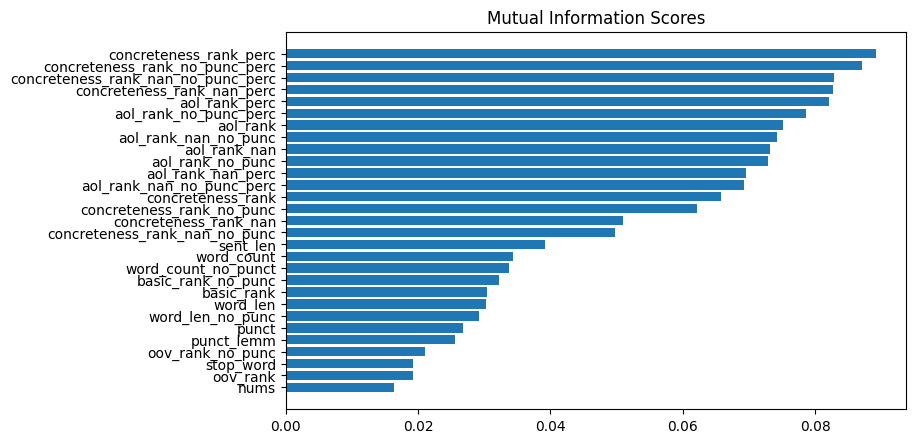

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_mi_scores(scores):
    import numpy as np
    import matplotlib.pyplot as plt
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    print(ticks)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

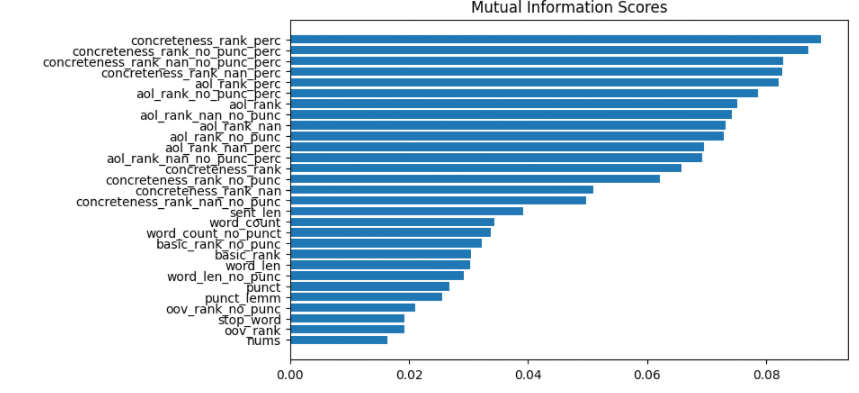

In [ ]:
normalized_df.groupby('label').mean()

,basic_rank,basic_rank_no_punc,oov_rank,oov_rank_no_punc,word_len,word_len_no_punc,sent_len,word_count_no_punct,word_count,punct,...,aol_rank_nan,aol_rank,aol_rank_nan_no_punc,aol_rank_no_punc,aol_rank_nan_perc,aol_rank_perc,aol_rank_nan_no_punc_perc,aol_rank_no_punc_perc,stop_word,nums
label,,,,,,,,,,,,,,,,,,,,,
0,0.161909,0.162336,0.026629,0.027367,-0.098289,-0.096711,-0.266173,-0.241279,-0.244014,-0.188634,...,-0.106046,-0.027006,-0.106046,-0.035590,-0.023515,0.019377,-0.023515,0.014989,-0.172917,-0.057868
1,-0.144902,-0.145285,-0.023832,-0.024493,0.087965,0.086553,0.238215,0.215936,0.218384,0.168821,...,0.094908,0.024169,0.094908,0.031852,0.021045,-0.017342,0.021045,-0.013414,0.154755,0.051790


In [ ]:
df['p']

In [ ]:
df[['punct', 'punct_lemm', 'label']].groupby('label').mean()

,punct,punct_lemm
label,,
0,1.952136,1.952136
1,2.643461,2.643461


In [ ]:
df.to_csv('df_train_with_ranks.csv')

In [ ]:
['basic_rank_no_punc', 
 'basic_rank', 'oov_rank', 
 'oov_rank_no_punc', 'punct_lemm', 
 'punct', 'word_len', 
 'word_len_no_punc', 
 'word_count_no_punct', 
 'word_count', 'sent_len', 
 'concreteness_rank_nan', 
 'concreteness_rank_nan_no_punc', 
 'concreteness_rank_no_punc', 
 'concreteness_rank',
 'aol_rank_nan_perc', 'aol_rank_nan_no_punc_perc',
 'aol_rank_no_punc', 'aol_rank_nan', 'aol_rank_nan_no_punc', 
 'aol_rank', 'aol_rank_no_punc_perc', 'aol_rank_perc', 'concreteness_rank_nan_no_punc_perc',
 'concreteness_rank_nan_perc', 'concreteness_rank_no_punc_perc', 'concreteness_rank_perc']


['basic_rank_no_punc',
 'basic_rank',
 'oov_rank',
 'oov_rank_no_punc',
 'punct_lemm',
 'punct',
 'word_len',
 'word_len_no_punc',
 'word_count_no_punct',
 'word_count',
 'sent_len',
 'concreteness_rank_nan',
 'concreteness_rank_nan_no_punc',
 'concreteness_rank_no_punc',
 'concreteness_rank',
 'aol_rank_nan_perc',
 'aol_rank_nan_no_punc_perc',
 'aol_rank_no_punc',
 'aol_rank_nan',
 'aol_rank_nan_no_punc',
 'aol_rank',
 'aol_rank_no_punc_perc',
 'aol_rank_perc',
 'concreteness_rank_nan_no_punc_perc',
 'concreteness_rank_nan_perc',
 'concreteness_rank_no_punc_perc',
 'concreteness_rank_perc']

In [ ]:
df_to_test = df[['concreteness_rank_perc','concreteness_rank_no_punc_perc' , 'aol_rank_perc',  'aol_rank_no_punc_perc', 'basic_rank', 'oov_rank',
 'oov_rank_no_punc','punct_lemm','punct', 'word_len', 'word_len_no_punc', 'word_count_no_punct', 'word_count', 'sent_len','label']]

In [ ]:
df_nan

,original_text,label,text_lemma,basic_rank,concreteness_rank
90,Walter Kogler,1,walter kogler,0.0,NaN
139,Alternating,1,alternating,0.0,NaN
140,OMIM =,1,omim =,0.0,NaN
157,ISBN 3-85052-197-4,1,isbn 3-85052-197-4,0.0,NaN
328,"Riverton , Mississippi , United States",1,"riverton , mississippi , united states",0.0,NaN
...,...,...,...,...,...
416553,Titus,0,titus,0.0,NaN
416564,Inglourious Basterds -LRB-/O2009/O-RRB-,0,inglourious basterds -lrb-/o2009/o-rrb-,0.0,NaN
416652,Writing numbers,0,writing number,0.0,NaN
416762,References,0,references,0.0,NaN


lowercase before lemmatizing

In [ ]:
lemmatize_text('references')

'reference'

In [ ]:
df[df.isna().any(axis=1)]['label'].value_counts()

0    5948
1    2795
Name: label, dtype: int64

In [ ]:
df[df.isna().any(axis=1)]

,original_text,label,text_lemma,basic_rank,concreteness_rank_nan,concreteness_rank,aol_rank_nan,aol_rank
90,Walter Kogler,1,walter kogler,0.0,NaN,0.0,NaN,0.0
140,OMIM =,1,omim =,0.0,NaN,0.0,NaN,0.0
157,ISBN 3-85052-197-4,1,isbn 3-85052-197-4,0.0,NaN,0.0,NaN,0.0
594,Cugy,1,cugy,0.0,NaN,0.0,NaN,0.0
607,! '',1,! '',0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...
416501,Werkelijke,0,werkelijke,0.0,NaN,0.0,NaN,0.0
416503,2005 - Toronto Aeros,0,2005 - toronto aeros,0.0,NaN,0.0,NaN,0.0
416553,Titus,0,titus,0.0,NaN,0.0,NaN,0.0
416564,Inglourious Basterds -LRB-/O2009/O-RRB-,0,inglourious basterds -lrb-/o2009/o-rrb-,0.0,NaN,0.0,NaN,0.0


In [ ]:
df_test = df_to_test.select_dtypes('number')

In [ ]:
df_nan = df[df['concreteness_rank'].isna()]
df_nan.groupby('label').mean()

,basic_rank,concreteness_rank
label,,
0,0.0,NaN
1,0.0,NaN


In [ ]:
df[df['concreteness_rank'] == 'NaN']

,original_text,label,text_lemma,basic_rank,concreteness_rank


find what stampede lemmatizes to; using nans, even if there are words that aren't in that dictionary, having another concrete one might be enough to infer the meaning

it's possible that if all three metrics are 0, then it needs to be simplified. could have case where not all are 0 and would not be simplified

what to do with punctation? could be meaningful to keep

could also fit word vectors for ground truth and find similarity scores for each text

below imagine wasn't lowercasing the lemma after getting so wasn't matching some

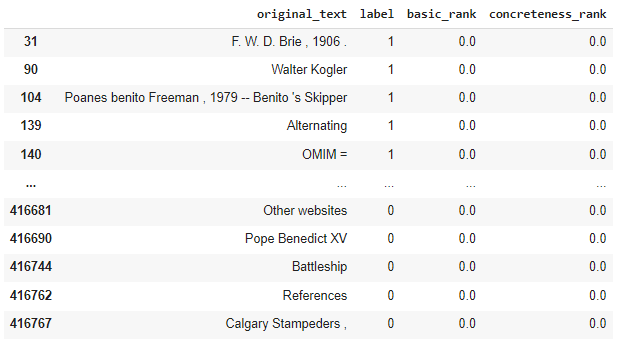

In [ ]:
import numpy as np
arr = np.array([3,0.0,2])

arr[arr == 0] = np.nan
arr

array([ 3., nan,  2.])

In [ ]:
df['original_text'] = df['original_text'].apply(lemmatize_text)

In [ ]:
df.sample(5)

,original_text,label
102108,The politics of the force were intermingled wi...,1
49653,The game comes bundled with a Wii MotionPlus d...,1
146642,Matringhem is a commune in the Pas-de-Calais d...,1
261946,"Hoffman was born in Los Angeles , California .",0
362449,Examples would be :,0


In [ ]:
set('There is manuscript evidence that Austen'.split())

{'Austen', 'There', 'evidence', 'is', 'manuscript', 'that'}

features for % basic, average concreteness, aol  scores

In [ ]:
df.head()

,original_text,label
0,There is manuscript evidence that Austen conti...,1
1,"In a remarkable comparative analysis , Mandaea...",1
2,"Before Persephone was released to Hermes , who...",1
3,Cogeneration plants are commonly found in dist...,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1


In [ ]:
s = df.iloc[0]['original_text']

In [ ]:
nlp_model = spacy.load('en_core_web_sm')

OSError: ignored

In [ ]:
tok = nlp_model(s)

NameError: ignored

In [ ]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
d = tokenizer(s)

In [ ]:
from spacy.lang.en import English
nlp = English()

# Creating a blank Tokenizer with just the English vocab
tokenizer = Tokenizer(nlp.vocab)
# tokens = tokenizer(s)
# # print("Blank tokenizer",end=" : ")
# # for token in tokens:
# #     print(token,end=', ')

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

token_list = []
for token in tok:
    token_list.append(token.text)

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp_model.vocab[word]
    if lexeme.is_stop == False and lexeme.is_punct == False: # remove stop words and punctutation 
        filtered_sentence.append(word) 
print(token_list)
print(filtered_sentence)   

['There', 'is', 'manuscript', 'evidence', 'that', 'Austen', 'continued', 'to', 'work', 'on', 'these', 'pieces', 'as', 'late', 'as', 'the', 'period', '1809', 'â', "''", '11', ',', 'and', 'that', 'her', 'niece', 'and', 'nephew', ',', 'Anna', 'and', 'James', 'Edward', 'Austen', ',', 'made', 'further', 'additions', 'as', 'late', 'as', '1814', '.']
['manuscript', 'evidence', 'Austen', 'continue', 'work', 'piece', 'late', 'period', '1809', 'â', '11', 'niece', 'nephew', 'Anna', 'James', 'Edward', 'Austen', 'addition', 'late', '1814']


##lemmatization

In [ ]:
lemma_word1 = [] 
for token in tok:
    lemma_word1.append(token.lemma_)
lemma_word1

NameError: ignored

In [ ]:
from collections import Counter, defaultdict
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
bigram_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, ngram_range=(1,2))
X_train = bigram_vectorizer.fit_transform(df.original_text)

In [ ]:
from pycaret.classification import *

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer,make_column_selector

In [ ]:
tf = TfidfVectorizer(stop_words='english', min_df=5, ngram_range=(1,2))

In [ ]:
from sklearn.decomposition import TruncatedSVD

X_train = tf.fit_transform(df.original_text)
svd = TruncatedSVD(n_components=40, random_state=42)
data = svd.fit_transform(X_train) 

In [ ]:
df2 = pd.DataFrame(data)

In [ ]:

df3 = pd.concat([df2, df['label']],axis= 1)

In [ ]:
import pandas as pd
df_test = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\df_train_with_ranks.csv')

In [ ]:
df_test_drop = df_test.dropna(how='any')

In [ ]:
label = df_test_drop['label']
df_test_drop.pop('label')

0         1
1         1
2         1
3         1
4         1
         ..
416763    0
416764    0
416765    0
416766    0
416767    0
Name: label, Length: 409601, dtype: int64

In [ ]:
normalized_df=(df_test_drop-df_test_drop.mean())/df_test_drop.std()

normalized_df = pd.concat([normalized_df,label], axis=1)

In [ ]:
def sent_length(text):
  return len(text)


def word_length(text):

  import numpy as np
  split_sent = text.split()

  text_array = np.array([len(i) for i in split_sent]) # if not present substitute 0 should think about making nan ht = defaultdict(lambda:np.Nan, ht), arr[arr == 0] = 'nan' # or use np.nan
  average_array = np.nanmean(text_array)


  return average_array

In [ ]:
def rare_punctuation(text):
  import string 
      
  # Storing the sets of punctuation in variable result 
  result = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
  
  split_sent = text.split()
  count = 0
  for i in split_sent:
    if i in result:
      count +=1

  return count


In [ ]:
df_test['word_len'] = df_test['original_text'].apply(word_length)
df_test['sent_len'] = df_test['original_text'].apply(sent_length)
df_test['punct'] = df_test['original_text'].apply(rare_punctuation)
df_test['punct_lemm'] = df_test['text_lemma'].apply(rare_punctuation)

In [ ]:
df_test_drop_col =  df_test_drop[['basic_rank','concreteness_rank_nan', 'concreteness_rank', 'aol_rank','label']]

In [ ]:
df_test

,original_text,label,text_lemma,basic_rank,concreteness_rank_nan,concreteness_rank,aol_rank_nan,aol_rank,word_len,sent_len,punct,punct_lemm
0,There is manuscript evidence that Austen conti...,1,there be manuscript evidence that austen conti...,0.348837,2.327333,1.623721,5.774483,3.894419,4.023256,215,3,3
1,"In a remarkable comparative analysis , Mandaea...",1,"in a remarkable comparative analysis , mandaea...",0.304348,2.325000,1.617391,7.426667,4.843478,5.739130,154,1,1
2,"Before Persephone was released to Hermes , who...",1,"before persephone be release to hermes , who h...",0.478261,2.346757,1.887609,5.441351,4.376739,4.413043,248,3,3
3,Cogeneration plants are commonly found in dist...,1,cogeneration plant be commonly find in distric...,0.435897,3.080645,2.448718,6.721000,5.170000,5.333333,246,6,6
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,"geneva -lrb- , ; , ; , ; ; -rrb- be the second...",0.250000,2.274667,0.947778,5.396667,2.248611,4.611111,201,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,a duke nukem 3d version have be sell for xbox ...,0.470588,2.478182,1.603529,6.146667,3.254118,3.705882,79,1,1
416764,"However , it is becoming replaced as a method ...",0,"however , it be become replace a a method of e...",0.550000,2.293333,2.064000,6.822222,6.140000,4.600000,111,1,1
416765,There are hand gestures in both Hindu and Budd...,0,there be hand gesture in both hindu and buddhi...,0.545455,2.761111,2.259091,6.788889,5.554545,4.909091,64,0,0
416766,"If it is necessary to use colors , try to choo...",0,"if it be necessary to use color , try to choos...",0.452381,2.402500,2.059286,5.069444,4.345238,4.166667,216,1,1


In [ ]:
df_test = df_test.select_dtypes('number')

In [ ]:
df_test.columns

Index(['label', 'basic_rank', 'concreteness_rank_nan', 'concreteness_rank',
       'aol_rank_nan', 'aol_rank', 'word_len', 'sent_len', 'punct',
       'punct_lemm'],
      dtype='object')

In [ ]:
df_test.drop(columns='Unnamed: 0',inplace=True)

In [ ]:
df_test_drop = df_test.dropna(how='any')

In [ ]:
df_test_drop = df_test_drop[['word_len', 'sent_len', 'label']]

In [ ]:
column_means = df_test.mean()
df_test_fill = df_test.fillna(column_means)


# df_test_fill = df_test.fillna(value='mean')

In [ ]:
df_test

,label,basic_rank,concreteness_rank_nan,concreteness_rank,aol_rank_nan,aol_rank,word_len,sent_len,punct,punct_lemm
0,1,0.348837,2.327333,1.623721,5.774483,3.894419,4.023256,215,3,3
1,1,0.304348,2.325000,1.617391,7.426667,4.843478,5.739130,154,1,1
2,1,0.478261,2.346757,1.887609,5.441351,4.376739,4.413043,248,3,3
3,1,0.435897,3.080645,2.448718,6.721000,5.170000,5.333333,246,6,6
4,1,0.250000,2.274667,0.947778,5.396667,2.248611,4.611111,201,7,7
...,...,...,...,...,...,...,...,...,...,...
416763,0,0.470588,2.478182,1.603529,6.146667,3.254118,3.705882,79,1,1
416764,0,0.550000,2.293333,2.064000,6.822222,6.140000,4.600000,111,1,1
416765,0,0.545455,2.761111,2.259091,6.788889,5.554545,4.909091,64,0,0
416766,0,0.452381,2.402500,2.059286,5.069444,4.345238,4.166667,216,1,1


In [ ]:
normalized_df

,concreteness_rank_perc,concreteness_rank_no_punc_perc,aol_rank_perc,aol_rank_no_punc_perc,basic_rank,oov_rank,oov_rank_no_punc,punct_lemm,punct,word_len,word_len_no_punc,word_count_no_punct,word_count,sent_len,label
0,-0.221266,-0.220770,-0.273306,-0.274674,-0.603480,0.596064,0.600895,0.962834,0.962834,-0.532420,-0.696349,1.639359,1.660920,1.376635,1
1,-0.215557,-0.323506,0.003868,-0.082727,-0.875025,-0.694498,-0.651475,-0.214318,-0.214318,1.363416,1.277665,0.121084,0.065026,0.495760,1
2,0.304436,0.207257,0.298332,0.244045,0.186470,0.165877,0.183439,0.962834,0.962834,-0.101751,-0.410484,1.996600,1.900304,1.853174,1
3,1.377501,1.855544,0.492513,1.410468,-0.072099,0.596064,0.600895,2.728561,2.728561,0.915059,0.860215,1.103497,1.341741,1.824293,1
4,-1.576124,-1.383745,-0.759253,-0.655739,-1.206742,-1.602671,-1.903845,3.317137,3.317137,0.117090,0.910676,0.746256,1.102357,1.174467,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416763,-0.283055,-0.280792,-0.997946,-1.031770,0.139639,0.596064,0.600895,-0.214318,-0.214318,-0.883079,-0.777473,-0.414777,-0.413742,-0.587282,0
416764,0.620962,0.590214,1.259040,1.397517,0.624337,0.596064,0.600895,-0.214318,-0.214318,0.104814,-0.263689,-0.146846,-0.174358,-0.125184,0
416765,1.034927,0.972676,1.302584,1.203593,0.596593,0.596064,0.600895,-0.802894,-0.802894,0.446322,0.352853,-0.861328,-0.892510,-0.803891,0
416766,0.656459,0.496876,0.529012,0.441837,0.028509,0.124907,0.151327,-0.214318,-0.214318,-0.373968,-0.513994,1.728669,1.581125,1.391076,0


In [ ]:
# text_feature = 'original_text'
# text_pipeline = Pipeline([
#                           ('tfidf', TfidfVectorizer(stop_words='english', min_df=500, ngram_range=(1,2)))
# ])

# ct = make_column_transformer(
#     (text_pipeline,
#      text_feature),
# )


clf = setup(normalized_df, target='label', session_id=123,
            preprocess=False, silent=True,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(409601, 15)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,0
8,Transformed Train Set,"(286720, 14)"
9,Transformed Test Set,"(122881, 14)"


In [ ]:
best_model = compare_models(exclude=['qda','lda'], fold=5)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6878,0.7719,0.7132,0.6852,0.6989,0.3751,0.3754,55.3560
et,Extra Trees Classifier,0.6830,0.7669,0.7076,0.6809,0.6940,0.3654,0.3657,41.9420
lightgbm,Light Gradient Boosting Machine,0.6552,0.7167,0.6997,0.6490,0.6734,0.3094,0.3104,2.6820
gbc,Gradient Boosting Classifier,0.6442,0.6988,0.6864,0.6396,0.6622,0.2875,0.2883,81.5920
dt,Decision Tree Classifier,0.6403,0.6392,0.6423,0.6470,0.6447,0.2805,0.2805,5.0340
ada,Ada Boost Classifier,0.6347,0.6843,0.6971,0.6261,0.6597,0.2678,0.2696,28.7500
knn,K Neighbors Classifier,0.6326,0.6837,0.6606,0.6324,0.6462,0.2644,0.2647,37.8560
lr,Logistic Regression,0.6261,0.6784,0.5753,0.6488,0.6099,0.2533,0.2550,3.7740
ridge,Ridge Classifier,0.6244,0.0000,0.5643,0.6501,0.6042,0.2503,0.2525,0.3840
svm,SVM - Linear Kernel,0.6204,0.0000,0.5096,0.6649,0.5769,0.2435,0.2506,1.3640


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
rf = create_model('rf')

NameError: ignored

In [ ]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6147,0.6614,0.7170,0.5954,0.6505,0.2293,0.2343
1,0.6106,0.6634,0.6667,0.5997,0.6314,0.2213,0.2227
2,0.6133,0.6603,0.7175,0.5939,0.6499,0.2265,0.2316
3,0.6155,0.6656,0.7320,0.5938,0.6557,0.2310,0.2375
4,0.6163,0.6638,0.6768,0.6039,0.6383,0.2326,0.2343
5,0.6126,0.6611,0.7193,0.5930,0.6500,0.2251,0.2304
6,0.6134,0.6615,0.7189,0.5938,0.6504,0.2266,0.2318
7,0.6166,0.6618,0.7352,0.5944,0.6574,0.2332,0.2400
8,0.6122,0.6619,0.7273,0.5914,0.6523,0.2244,0.2306
9,0.6185,0.6644,0.7312,0.5969,0.6572,0.2369,0.2431


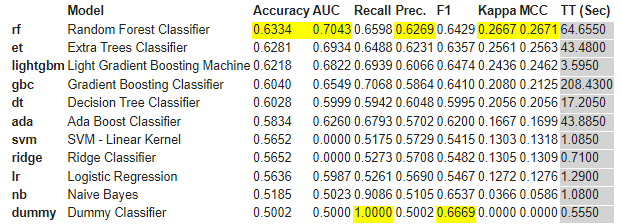

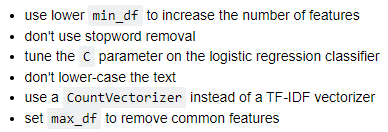

In [ ]:
df_test_drop.groupby('label').mean()

,basic_rank,concreteness_rank_nan,concreteness_rank,aol_rank_nan,aol_rank
label,,,,,
0,0.476067,2.592870,1.833412,5.954314,4.175547
1,0.435934,2.534615,1.754972,6.070297,4.144555


# generating dense vectors

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\WikiLarge_Train.csv')

## tokenization

In [ ]:
import numpy as np
train_df, dev_df, test_df = \
              np.split(df.sample(frac=1, random_state=22), 
                       [int(.8*len(df)), int(.9*len(df))])
                       

In [ ]:
>>> import nltk
>>> nltk.download('stopwords')
from tqdm import tqdm
import re
import gensim
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# YOUR CODE HERE
first_pass = []
tokenized_train_items = []
skip = set(stopwords.words('english'))

for bio in tqdm(df['original_text']):
    temp = list(re.findall(r'\w+', bio))
    first_pass.append(temp)

    temp = [w.lower() for w in temp if w.lower() not in skip]
    tokenized_train_items.append(temp)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\corsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 416768/416768 [00:09<00:00, 45232.73it/s]


In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format("D:\Downloads\glove.6b\glove.6B.300d.txt", binary=False)

In [ ]:
def generate_dense_features(tokenized_texts, word_vectors): 
    #HINT: Create an empty list to hold your results 
        #HINT:Iterate through each item in tokenized_text
            #HINT:Create a list that contains current item(s) if found in word_vectors.vocab
            #HINT:if the length of this list is greater than zero:
                #HINT:We set this as a feature, this is done by using numpy’s mean function and append it to our results list 
            #HINT:Otherwise: create a vector of numpy zeros using word_vectors.vector_size as the parameter and append it to the results list
    #HINT:Return the results list as a numpy array (data type)
    import numpy as np
    # YOUR CODE HERE
    results = []
    for item in tokenized_texts:
        temp = [i for i in item if i in word_vectors.key_to_index]
        if len(temp) > 0 :
            results.append(np.mean(word_vectors[temp],axis=0)) #can also pass all words in at once, but did this method
            
        else:
            results.append(np.zeros(word_vectors.vector_size))
            
    return np.array(results)

In [ ]:
X_train_wp = generate_dense_features(tokenized_train_items, model)

In [ ]:
X_train_wp

array([[-0.02350625, -0.12460057, -0.23026684, ..., -0.19730856,
        -0.08858313,  0.03055525],
       [-0.01202874,  0.1109045 , -0.00648066, ..., -0.04726169,
        -0.1000015 , -0.05872038],
       [-0.09904318,  0.06168618, -0.02186305, ..., -0.13245144,
        -0.14939456, -0.09850757],
       ...,
       [-0.24867   , -0.08715   , -0.086358  , ...,  0.14562   ,
         0.13619767, -0.39180103],
       [-0.12776656,  0.06643626,  0.10554238, ...,  0.03426769,
         0.24862611, -0.01243238],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
first_pass = []
tokenized_train_items_dev = []
skip = set(stopwords.words('english'))

for bio in tqdm(dev_df['original_text']):
    temp = list(re.findall(r'\w+', bio))
    first_pass.append(temp)

    temp = [w for w in temp if w.lower() not in skip]
    tokenized_train_items_dev.append(temp)

first_pass = []
tokenized_train_items_test = []
skip = set(stopwords.words('english'))

for bio in tqdm(test['original_text']):
    temp = list(re.findall(r'\w+', bio))
    first_pass.append(temp)

    temp = [w for w in temp if w.lower() not in skip]
    tokenized_train_items_test.append(temp)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 41677/41677 [00:00<00:00, 58762.69it/s]


In [ ]:
X_dev = generate_dense_features(tokenized_train_items_dev, model)
X_test= generate_dense_features(tokenized_train_items_test, model)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_train = train_df['label']
y_dev = dev_df['label']
y_test = test_df['label']

In [ ]:
clf_wp = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000, random_state=22)
clf_wp.fit(X_train_wp, y_train)

LogisticRegression(max_iter=10000, random_state=22)

In [ ]:
from sklearn.metrics import f1_score

lr_wp_tiny_dev_preds= clf_wp.predict(X_dev)
lr_wp_f1 = f1_score(y_dev, lr_wp_tiny_dev_preds)


In [ ]:
lr_wp_f1

0.6288012182934374

In [ ]:
concreteness['scaled_m'] = concreteness['Conc.M']*concreteness['Percent_known']


In [ ]:
concreteness['quantiles'] = pd.qcut(concreteness['scaled_m'],labels=False, q=10)

In [ ]:
concreteness.groupby('quantiles').mean()[['Conc.M','scaled_m']]

,Conc.M,scaled_m
quantiles,,
0,1.627916,1.520962
1,1.908152,1.820591
2,2.139966,2.046942
3,2.385381,2.291640
4,2.702609,2.593846
5,3.059972,2.945210
6,3.455490,3.336855
7,3.905378,3.781713
8,4.387715,4.298709


In [ ]:
top_quartiles_concreteness = concreteness[concreteness['quantiles'].isin([7,8,9])]['Word'].to_list()
middle_quartiles_concreteness = concreteness[concreteness['quantiles'].isin([4,5,6])]['Word'].to_list()
lower_quartiles_concreteness = concreteness[concreteness['quantiles'].isin([0,1,2,3])]['Word'].to_list()

In [ ]:
aol['scaled_m'] = aol['AoA_Kup_lem']*aol['Perc_known_lem']
aol['quantiles'] = pd.qcut(aol['scaled_m'],labels=False, q=10)

In [ ]:
aol.groupby('quantiles').mean()[['AoA_Kup_lem','scaled_m']]

,AoA_Kup_lem,scaled_m
quantiles,,
0.0,7.295612,4.264414
1.0,7.920775,6.132253
2.0,8.755929,7.278838
3.0,9.434804,8.171209
4.0,10.067738,8.918324
5.0,10.632910,9.604959
6.0,11.226849,10.272846
7.0,11.840295,10.971040
8.0,12.585583,11.788265


In [ ]:
top_quartiles_aol = aol[aol['quantiles'].isin([7,8,9])]['Word'].to_list()
middle_quartiles_aol = aol[aol['quantiles'].isin([4,5,6])]['Word'].to_list()
lower_quartiles_aol = aol[aol['quantiles'].isin([0,1,2,3])]['Word'].to_list()

In [ ]:

model[i for i in top_quartiles_aol if i in model.key_to_index]

In [ ]:
p = np.mean(model[temp],axis=0)

In [ ]:
p.shape

(300,)

In [ ]:


from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(p.reshape(-1,300,),p.reshape(-1,300))



array([[1.]], dtype=float32)

In [ ]:
import numpy as np

In [ ]:
def quartile_similarity(tokenized_texts, quartile_list):

  import numpy as np
  from sklearn.metrics.pairwise import cosine_similarity
  top = [i for i in quartile_list[0] if i in model.key_to_index]
  mid = [i for i in quartile_list[1] if i in model.key_to_index]
  bottom = [i for i in quartile_list[2] if i in model.key_to_index]

  top_vec = np.mean(model[top],axis=0)
  mid_vec = np.mean(model[mid],axis=0)
  bottom_vec = np.mean(model[bottom],axis=0)


  # YOUR CODE HERE
  top_results = []
  mid_results = []
  bottom_results = []

  for item in tokenized_texts:
      temp = [i for i in item if i in model.key_to_index]
      if len(temp) > 0 :
          temp_res = np.mean(model[temp],axis=0)
          top_results.append(np.ravel(cosine_similarity(temp_res.reshape(-1,300,),top_vec.reshape(-1,300)))) 
          mid_results.append(np.ravel(cosine_similarity(temp_res.reshape(-1,300,),mid_vec.reshape(-1,300))))
          bottom_results.append(np.ravel(cosine_similarity(temp_res.reshape(-1,300,),bottom_vec.reshape(-1,300))))
          
      else:
          top_results.append(np.array([0.0]))
          mid_results.append(np.array([0.0]))
          bottom_results.append(np.array([0.0]))
          
  return top_results, mid_results, bottom_results


In [ ]:
top_aol,mid_aol,bot_aol = quartile_similarity(tokenized_train_items, [top_quartiles_aol, middle_quartiles_aol, lower_quartiles_aol])

In [ ]:
top_con,mid_con,bot_con = quartile_similarity(tokenized_train_items, [top_quartiles_concreteness, middle_quartiles_concreteness, lower_quartiles_concreteness])

In [ ]:
s =  ['top_aol','mid_aol','bot_aol','top_con','mid_con','bot_con']
for i in s:
  df[i] = eval(i)

In [ ]:
df

,original_text,label,top_aol,mid_aol,bot_aol,top_con,mid_con,bot_con
0,There is manuscript evidence that Austen conti...,1,[-0.37141532],[-0.35804504],[-0.24380478],[-0.18652943],[-0.2821633],[-0.28259793]
1,"In a remarkable comparative analysis , Mandaea...",1,[0.003355795],[-0.04868604],[-0.08670596],[-0.14069462],[-0.0044107707],[0.06811517]
2,"Before Persephone was released to Hermes , who...",1,[-0.2303474],[-0.17144765],[0.02262747],[0.031259473],[-0.059297837],[-0.19280332]
3,Cogeneration plants are commonly found in dist...,1,[-0.23821099],[-0.22700252],[-0.12399283],[-0.085915856],[-0.09480366],[-0.212761]
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,[-0.18674688],[-0.17964005],[-0.15711965],[-0.15991654],[-0.1459551],[-0.1567106]
...,...,...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,[-0.37623993],[-0.35532305],[-0.21729384],[-0.13942683],[-0.22776431],[-0.31879115]
416764,"However , it is becoming replaced as a method ...",0,[-0.22666098],[-0.24104525],[-0.18091497],[-0.17705551],[-0.10622835],[-0.137419]
416765,There are hand gestures in both Hindu and Budd...,0,[0.053597856],[0.06936591],[0.1180115],[0.077153206],[0.09918713],[0.11508022]
416766,"If it is necessary to use colors , try to choo...",0,[-0.11877045],[-0.07170235],[0.13616276],[0.17534916],[0.06979217],[-0.03860653]


In [ ]:
basic_word = basic[0].to_list()

In [ ]:
def quartile_similarity_single(tokenized_texts, quartile_list):

  import numpy as np
  from sklearn.metrics.pairwise import cosine_similarity
  top = [i for i in quartile_list if i in model.key_to_index]

  top_vec = np.mean(model[top],axis=0)


  # YOUR CODE HERE
  top_results = []
  mid_results = []
  bottom_results = []

  for item in tokenized_texts:
      temp = [i for i in item if i in model.key_to_index]
      if len(temp) > 0 :
          temp_res = np.mean(model[temp],axis=0)
          top_results.append(np.ravel(cosine_similarity(temp_res.reshape(-1,300,),top_vec.reshape(-1,300)))) 

          
      else:
          top_results.append(np.array([0.0]))

          
  return top_results

In [ ]:
basic_sim = quartile_similarity_single(tokenized_train_items, basic_word)

In [ ]:
df['basic_sim'] = basic_sim

In [ ]:
df_ranks = pd.read_csv(r'C:\Users\corsi\Downloads\umich-siads-695-fall21-predicting-text-difficulty\df_train_with_ranks.csv')

In [ ]:
df_ranks = df_ranks.select_dtypes('number')

In [ ]:
df_final = df.join(df_ranks.drop(columns=['label']),how='left')

In [ ]:
df_final.columns

Index(['original_text', 'label', 'top_aol', 'mid_aol', 'bot_aol', 'top_con',
       'mid_con', 'bot_con', 'basic_sim', 'Unnamed: 0', 'basic_rank',
       'basic_rank_no_punc', 'oov_rank', 'oov_rank_no_punc', 'word_len',
       'word_len_no_punc', 'sent_len', 'word_count_no_punct', 'word_count',
       'punct', 'punct_lemm', 'concreteness_rank_nan', 'concreteness_rank',
       'concreteness_rank_nan_no_punc', 'concreteness_rank_no_punc',
       'concreteness_rank_nan_perc', 'concreteness_rank_perc',
       'concreteness_rank_nan_no_punc_perc', 'concreteness_rank_no_punc_perc',
       'aol_rank_nan', 'aol_rank', 'aol_rank_nan_no_punc', 'aol_rank_no_punc',
       'aol_rank_nan_perc', 'aol_rank_perc', 'aol_rank_nan_no_punc_perc',
       'aol_rank_no_punc_perc', 'stop_word', 'nums'],
      dtype='object')

In [ ]:
df_final = df_final.drop(columns=['Unnamed: 0'])

In [ ]:
df_final.to_csv('final_df_ranks.csv')

In [ ]:
df_final.columns

Index(['original_text', 'label', 'top_aol', 'mid_aol', 'bot_aol', 'top_con',
       'mid_con', 'bot_con', 'basic_sim', 'basic_rank', 'basic_rank_no_punc',
       'oov_rank', 'oov_rank_no_punc', 'word_len', 'word_len_no_punc',
       'sent_len', 'word_count_no_punct', 'word_count', 'punct', 'punct_lemm',
       'concreteness_rank_nan', 'concreteness_rank',
       'concreteness_rank_nan_no_punc', 'concreteness_rank_no_punc',
       'concreteness_rank_nan_perc', 'concreteness_rank_perc',
       'concreteness_rank_nan_no_punc_perc', 'concreteness_rank_no_punc_perc',
       'aol_rank_nan', 'aol_rank', 'aol_rank_nan_no_punc', 'aol_rank_no_punc',
       'aol_rank_nan_perc', 'aol_rank_perc', 'aol_rank_nan_no_punc_perc',
       'aol_rank_no_punc_perc', 'stop_word', 'nums'],
      dtype='object')

In [ ]:
df_final

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# df_test_drop = df.copy().dropna()
# df_test_drop = df_test_drop.select_dtypes('number')
# df_test_drop.pop('label')
# # label = df['label'].copy()
# # normalized_df=(df_test_drop-df_test_drop.mean())/df_test_drop.std()

# # normalized_df = pd.concat([normalized_df,label], axis=1)

# from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler = MinMaxScaler()
# standard = StandardScaler()
# normalized_df = pd.DataFrame(standard.fit_transform(df_test_drop), columns=df_test_drop.columns)
# normalized_df = pd.concat([normalized_df,label], axis=1)
X =df_final[['top_aol', 'mid_aol', 'bot_aol', 'top_con','mid_con', 'bot_con', 'basic_sim', 'basic_rank']].dropna()
y = df_final['label']


#mutual_info_classif(X,y)

In [ ]:
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)

In [ ]:
!pip install matplotlib

  Using cached matplotlib-3.5.1-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached Pillow-9.0.0-cp39-cp39-win_amd64.whl (3.2 MB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)
  Using cached kiwisolver-1.3.2-cp39-cp39-win_amd64.whl (52 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


['basic_rank', 'mid_con', 'bot_aol', 'mid_aol', 'top_aol', 'bot_con', 'top_con', 'basic_sim']


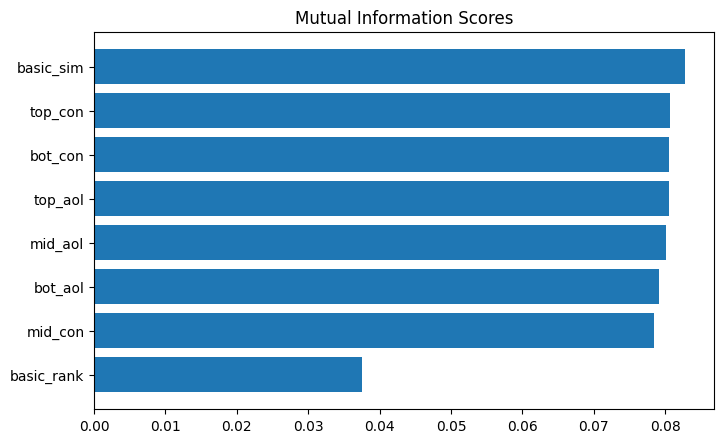

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_mi_scores(scores):
    import numpy as np
    import matplotlib.pyplot as plt
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
    print(ticks)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

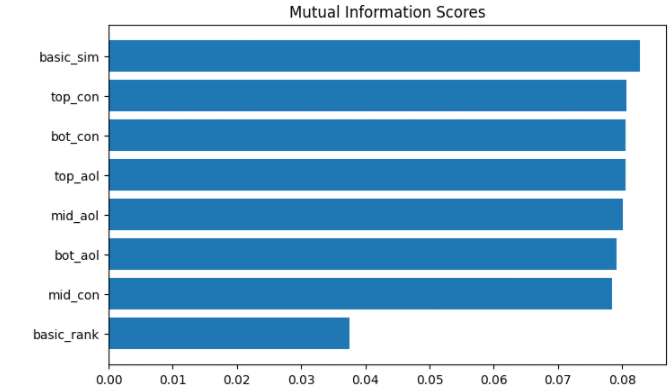